<a href="https://colab.research.google.com/github/VDidyk/AI/blob/master/module2/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [3]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [6]:
df.describe(include='number')

#Медіана віку пасажирів становить 30 років. Переважно пасажири їздять без сімʼї. Також в більшості люди обирають другий клас. 177 клієнтів не вказали свій вік.

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


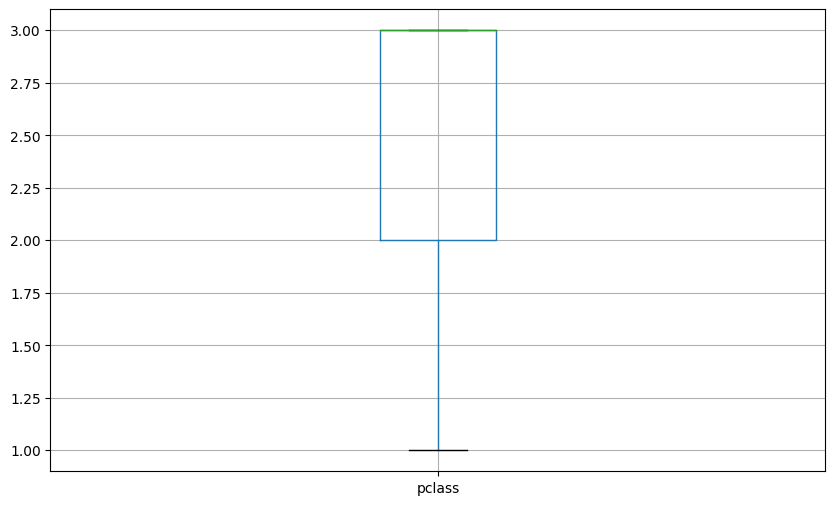

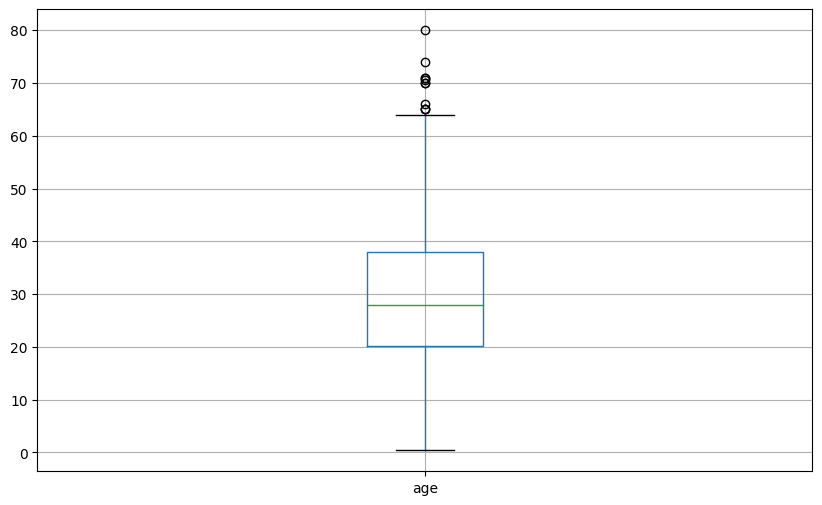

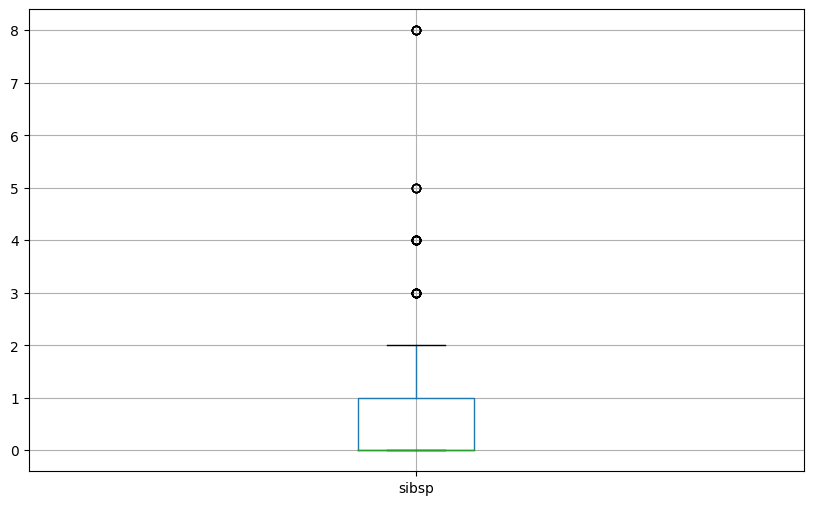

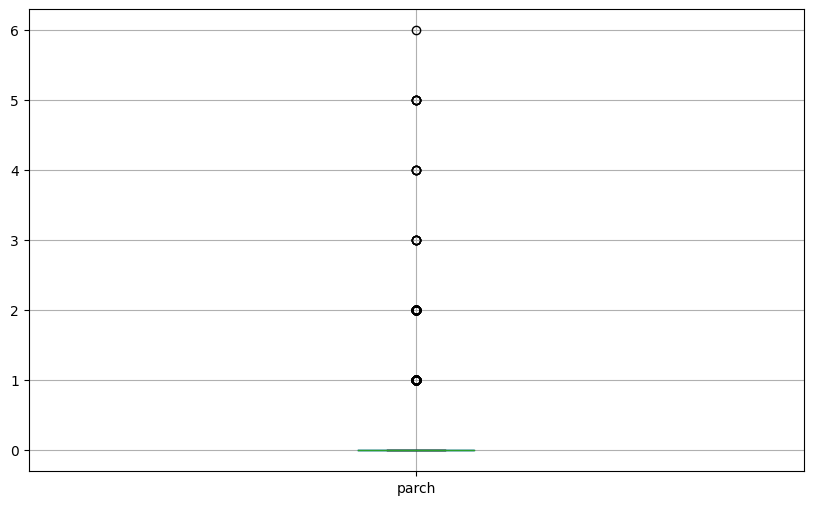

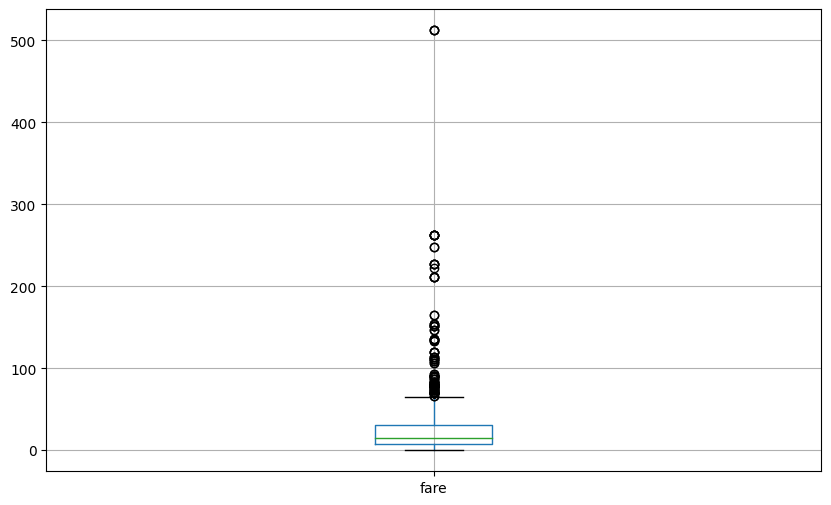

In [33]:
def show_boxplots():
  for column_name in df.columns:
    if df.dtypes[column_name] not in ("object", "datetime64[ns]"):
       df[[column_name]].boxplot(figsize=(10,6))
       plt.show()

show_boxplots()
#Судячи по боксплотам, потрібно почистити усі колонки окрім pclass.

In [54]:
num_columns = df.select_dtypes(include="number").columns
sales_num = df[num_columns]

q1 = sales_num.quantile(q=0.25)
q3 = sales_num.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (sales_num >= lower) & (sales_num <= upper)
mask = mask.all(axis=1)

df = df[mask]



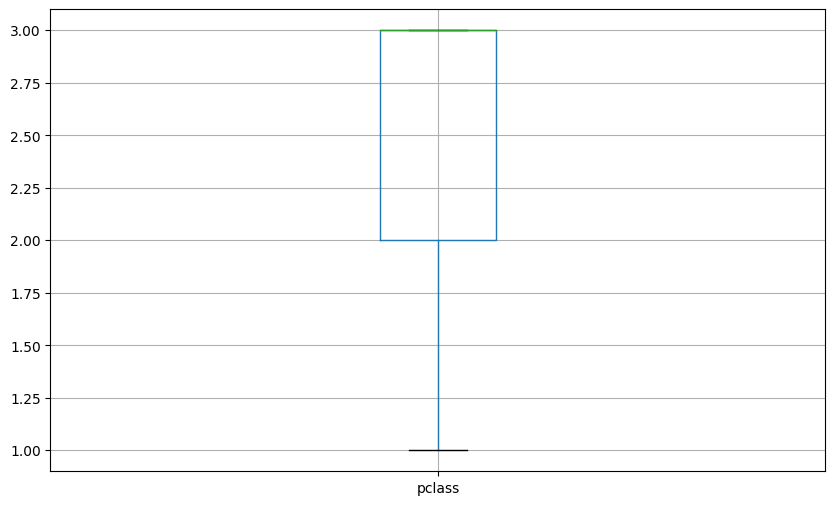

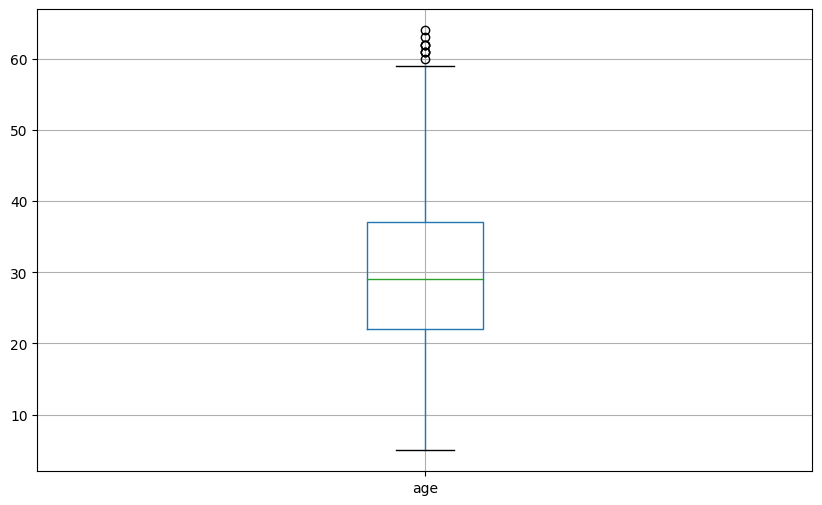

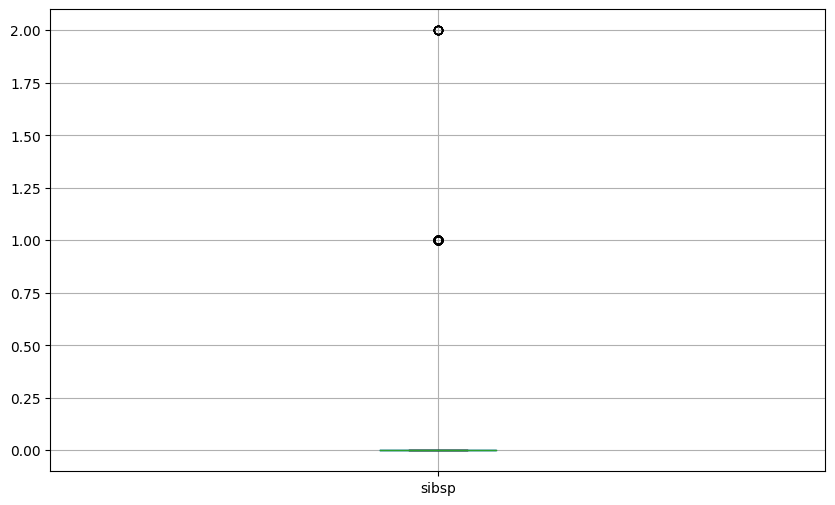

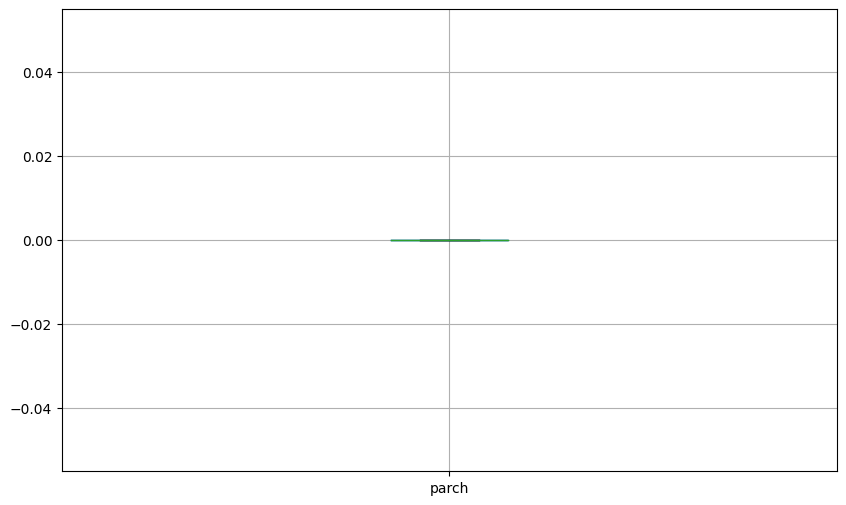

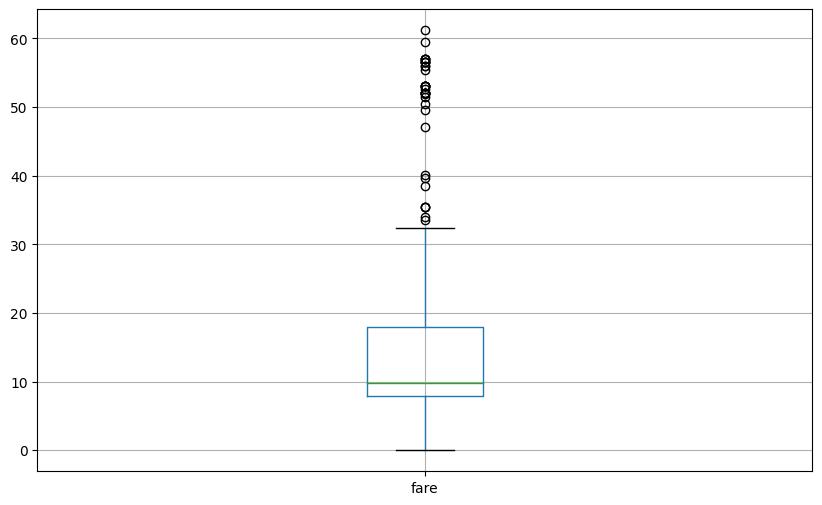

In [55]:
show_boxplots()

In [56]:
df.describe(include='number')

#Після очищення все одно залишається багато викидів. Продував двома методами.
#Після очищення викидів середній вік змінився на 31, кі-сть батьків опустилась до 0, що означає що випадки були одиничні, відповідно викиди. Видалились рядки де вік був пустий.

,pclass,age,sibsp,parch,fare
count,449.000000,449.000000,449.000000,449.0,449.000000
mean,2.414254,31.121381,0.204900,0.0,15.623690
std,0.757328,11.473877,0.446087,0.0,12.685519
min,1.000000,5.000000,0.000000,0.0,0.000000
25%,2.000000,22.000000,0.000000,0.0,7.879200
50%,3.000000,29.000000,0.000000,0.0,9.841700
75%,3.000000,37.000000,0.000000,0.0,18.000000
max,3.000000,64.000000,2.000000,0.0,61.175000


<ipython-input-57-1120685b1295>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


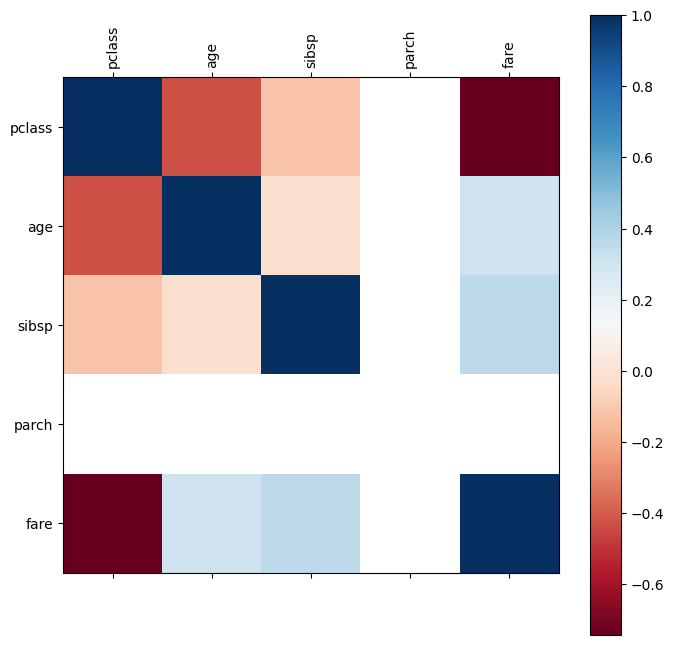

In [57]:
corr = df.corr(method='spearman')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()



<Axes: xlabel='age', ylabel='pclass'>

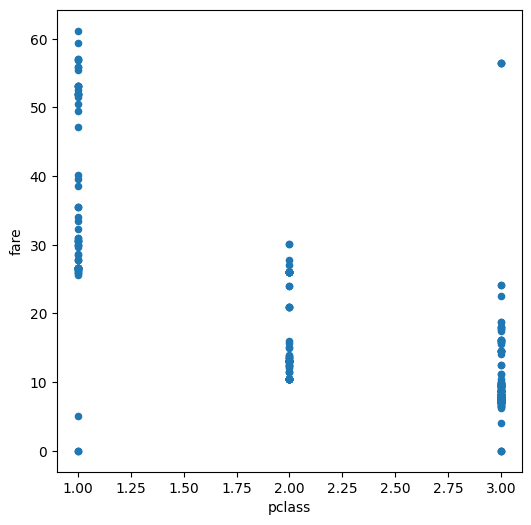

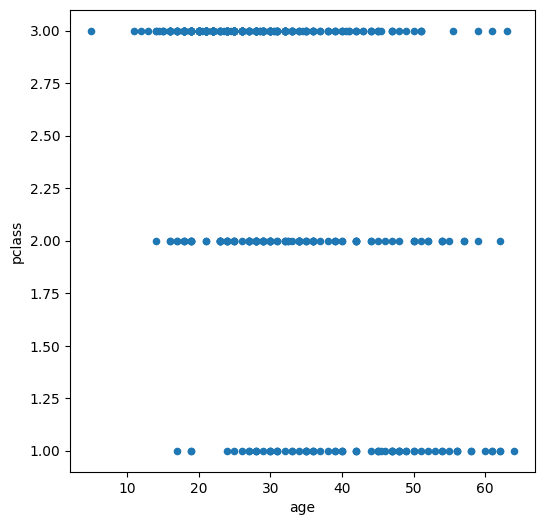

In [58]:
df.plot(kind='scatter', x='pclass', y='fare', figsize=(6,6))
df.plot(kind='scatter', x='age', y='pclass', figsize=(6,6))


#По корялеції видно що ціна залежить від класу. Чим нижча цифра класу тим вища ціна. І також трішки корелює клас та вік. Щоправда кореляція не значна, і складно зрозуміти який вік якому класу надає перевагу.


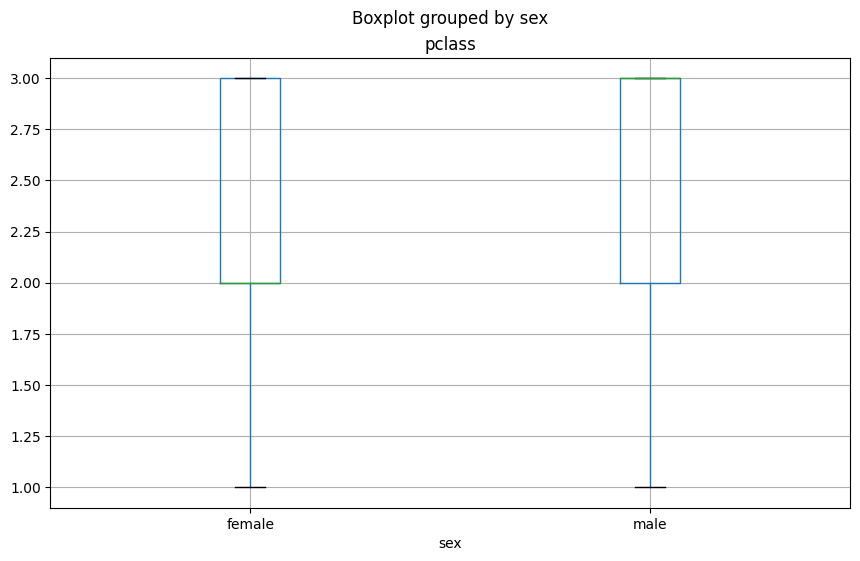

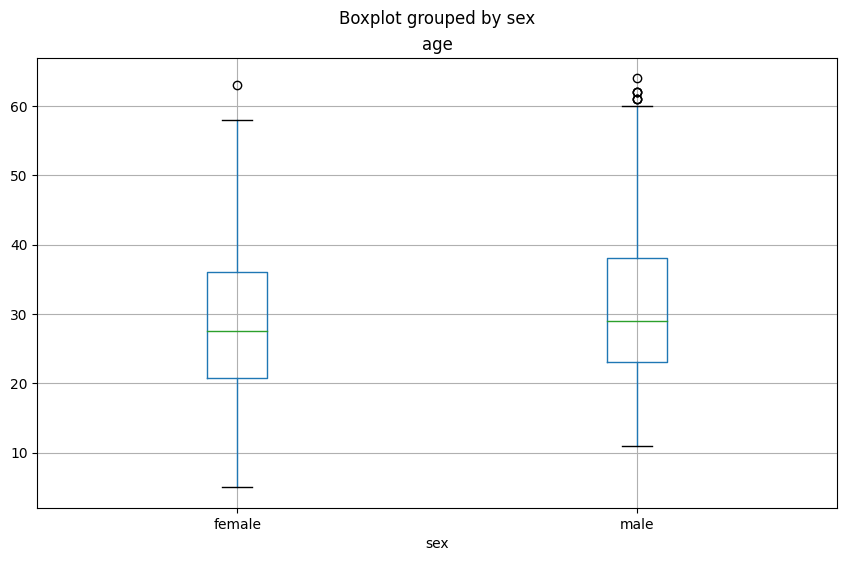

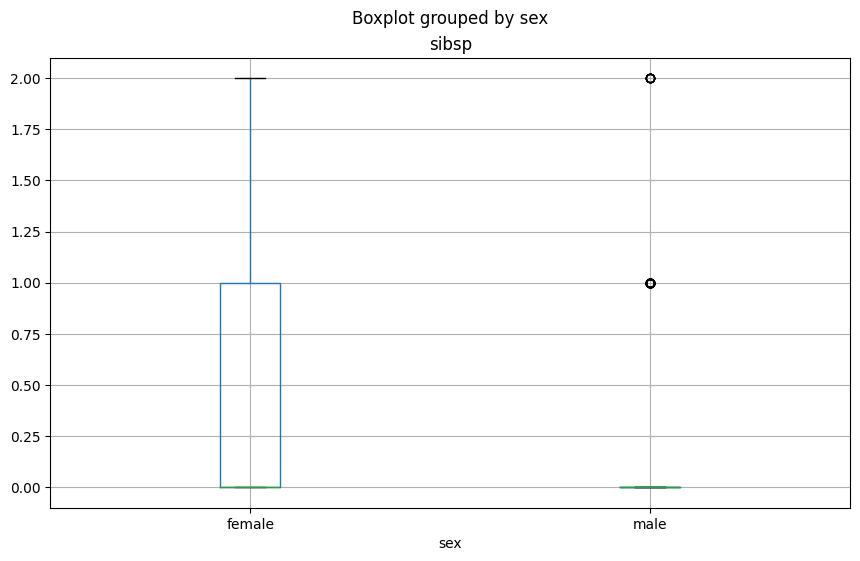

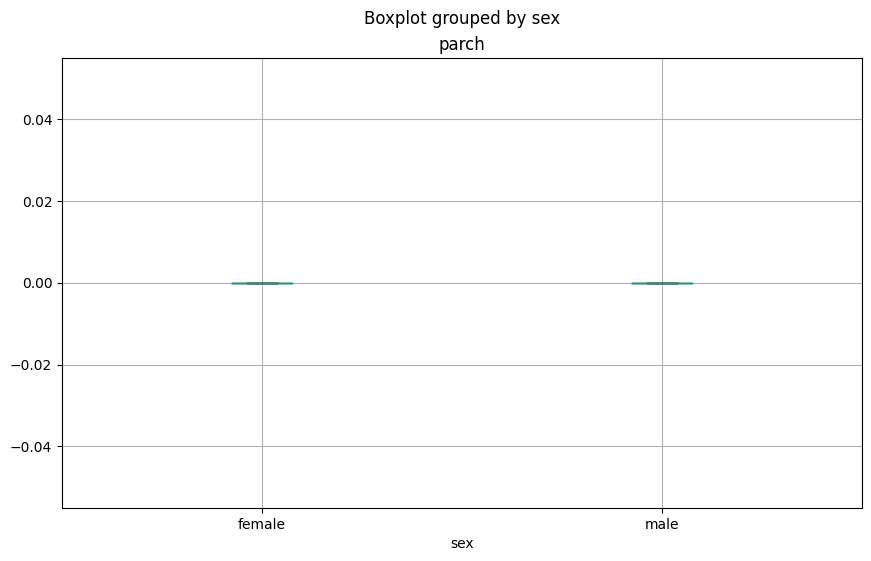

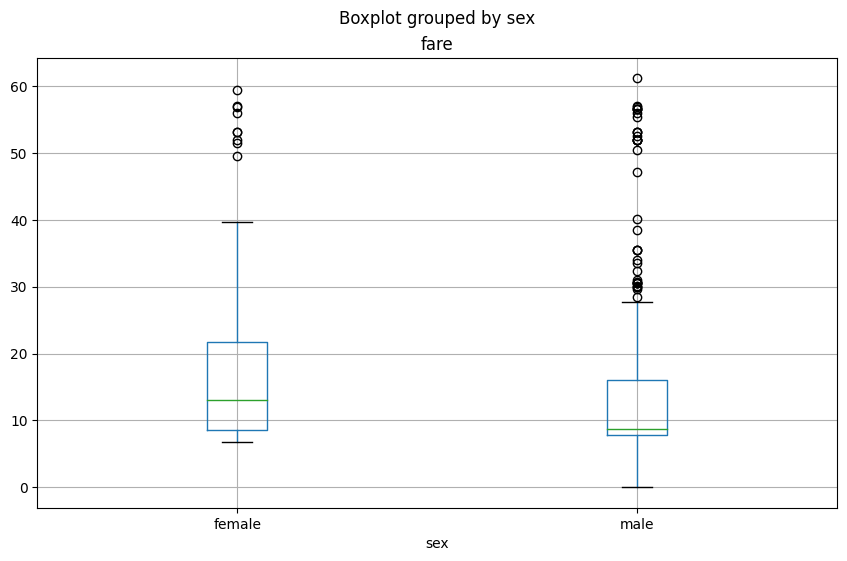

In [62]:
for column_name in df.columns:
    if df.dtypes[column_name] not in ("object", "datetime64[ns]"):
        df.boxplot(column=column_name, by='sex', figsize=(10,6))

Аналіз по статі показує що жінки надають більшу перевагу кращому класу ніж чоловіки. Також жінки більше витрачають кошти ніж чоловіки. Це може бути повʼязаним з перевагою в класі та той факт що жінки їздять з сімʼєю, а чоловіки ні.

<Axes: title={'center': 'fare'}, xlabel='age'>

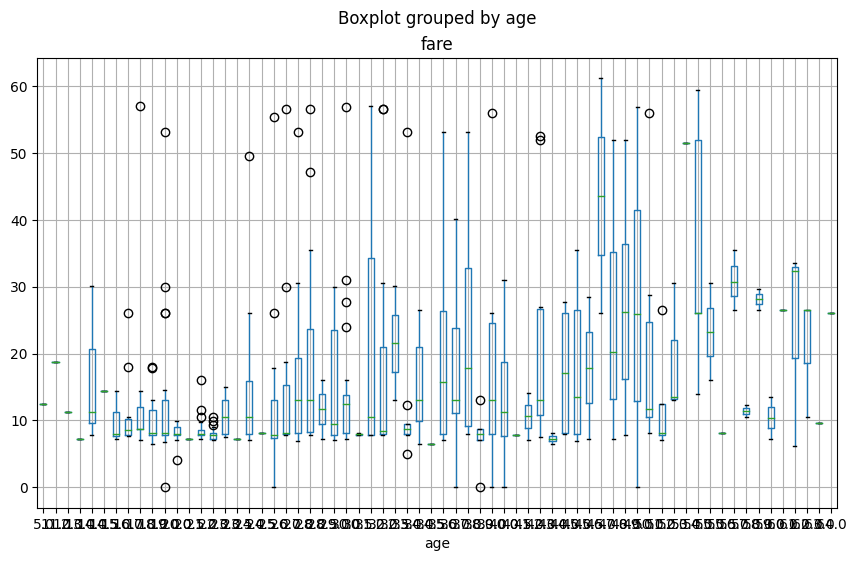

In [64]:
df.boxplot(column='fare', by='age', figsize=(10,6))

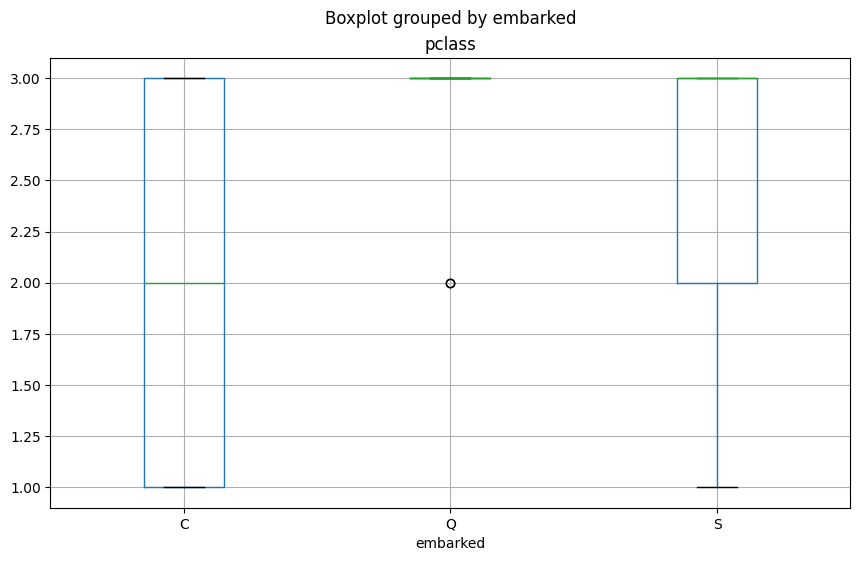

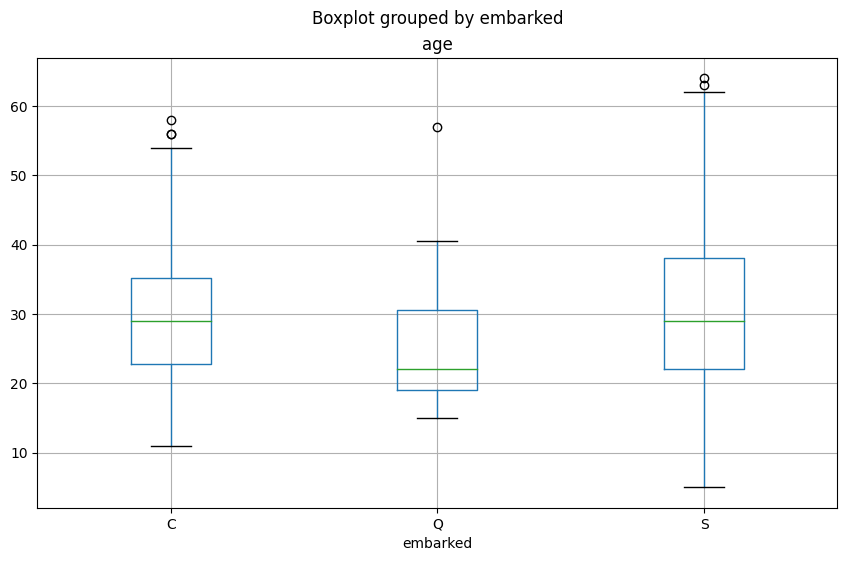

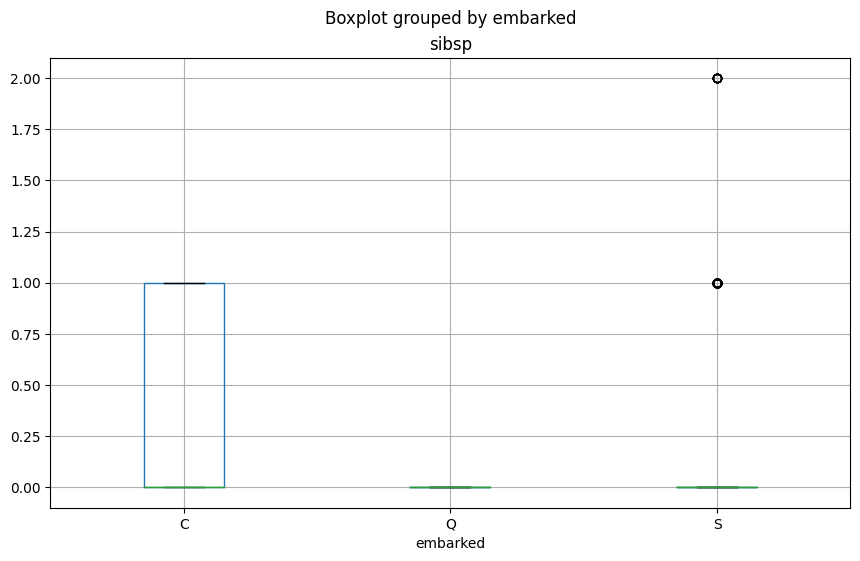

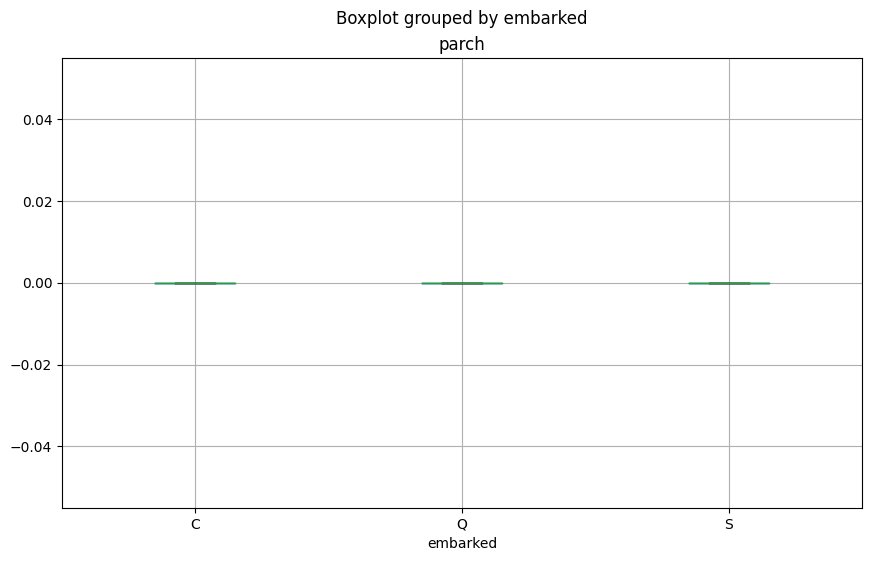

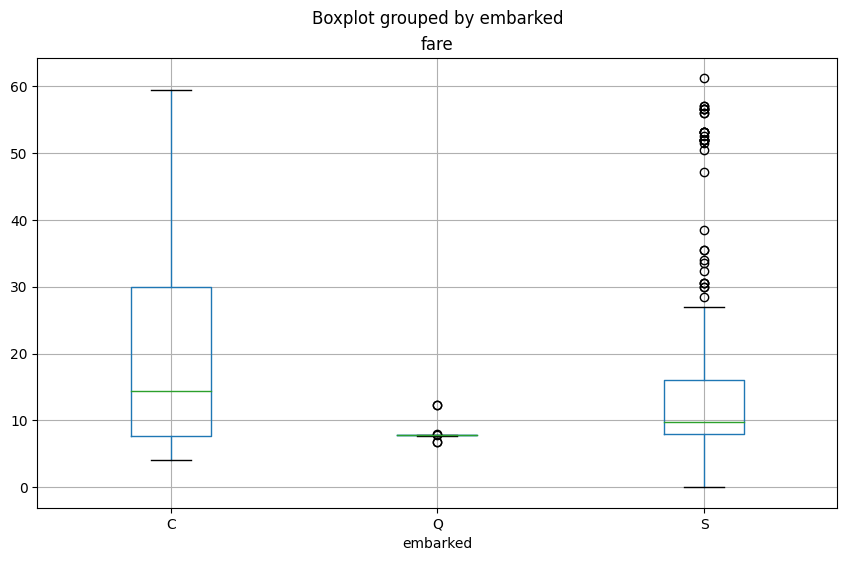

In [63]:
for column_name in df.columns:
    if df.dtypes[column_name] not in ("object", "datetime64[ns]"):
        df.boxplot(column=column_name, by='embarked', figsize=(10,6))

Аналіз по порту показує що у Квінстаун усі обирають 3й клас. У Саутгемптон переважно 3й клас і рідко 1й. А у Саутгемптон переважно 2й, але і усі решта.

Також у Квінстаун їде переважно молодь, а сімʼї у Саутгемптон.

Порт Саутгемптон по факту виходить найдорожчий і має найбільший оборот, коли Квінстаун завжди має однакову ціну.

На аналіз бітьків потрібно більше даних.

**Підсумок:**

Якщо ціль знайти таргетингову аудиторію, я би цілився на жінок старшого віку, так як жінки надають перевагу дорожчому класу, та беруть з собою родину. І по категорійному боксплоту видно що старші люди витрачають грошей більше. І рекламува я б Саутгемптон, так як він збирає більший оборот.